In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random

In [ ]:
class Environment(gym.Env):

    def __init__(self):
        self.board = np.zeros((4, 4))
        starting_pos = [0,0]
        self.board[tuple(starting_pos)] = 1

        reward_one = [0,3]                 # reward_one = -7
        self.board[tuple(reward_one)] = 0.6
        reward_two = [1,1]                 # reward_two = +3                 
        self.board[tuple(reward_two)] = 0.6
        reward_three = [2,3]               # reward_three = -5
        self.board[tuple(reward_three)] = 0.6
        reward_four = [3,0]                # reward_four = +5
        self.board[tuple(reward_four)] = 0.6

        goal_pos = [3,1]                   # reward for goal = +10
        self.board[tuple(goal_pos)] = 0.2

        self.total_reward = 0

        self.obs_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 50

    def reset(self):
        self.timestep = 0
        self.total_reward = 0
        self.board = np.zeros((4,4))

        x, y = random.choice(list(state_lookup))
        self.cur_pos = [x,y]
        self.board[tuple(self.cur_pos)] = 1

        reward_one = [0,3]                 # reward_one = -7
        self.board[tuple(reward_one)] = 0.6
        reward_two = [1,1]                 # reward_two = +3                 
        self.board[tuple(reward_two)] = 0.6
        reward_three = [2,3]               # reward_three = -5
        self.board[tuple(reward_three)] = 0.6
        reward_four = [3,0]                # reward_four = +5
        self.board[tuple(reward_four)] = 0.6

        self.goal_pos = [3,1]                   # reward for goal = +10
        self.board[tuple(self.goal_pos)] = 0.2

        obs = self.board.flatten()

        return obs, self.cur_pos

    """ actions defined as: 0 --> up, 1 --> down, 2 --> right, 3 --> left """
    def step(self, action):
        if action == 0:
          self.cur_pos[0] -= 1
        elif action == 1:
          self.cur_pos[0] += 1
        elif action == 2:
          self.cur_pos[1] += 1
        elif action == 3:
          self.cur_pos[1] -=1

        self.cur_pos = np.clip(self.cur_pos, 0,3)
        self.board = np.zeros((4,4))

        reward_one = [0,3]                 # reward_one = -7
        self.board[tuple(reward_one)] = 0.6
        reward_two = [1,1]                 # reward_two = +3                 
        self.board[tuple(reward_two)] = 0.6
        reward_three = [2,3]               # reward_three = -5
        self.board[tuple(reward_three)] = 0.6
        reward_four = [3,0]                # reward_four = +5
        self.board[tuple(reward_four)] = 0.6

        self.board[tuple(self.goal_pos)] = 0.2  # reward for goal = +10
        self.board[tuple(self.cur_pos)] = 1

        obs = self.board

        if(tuple(self.cur_pos) == tuple(reward_one)):
          self.total_reward = -7
        elif(tuple(self.cur_pos) == tuple(reward_two)):
          self.total_reward = 3
        elif(tuple(self.cur_pos) == tuple(reward_three)):
          self.total_reward = -5
        elif(tuple(self.cur_pos) == tuple(reward_four)):
          self.total_reward = 5
        elif(self.cur_pos == self.goal_pos).all():
          self.total_reward = 10
        else:
          self.total_reward = 0

        self.timestep += 1
        # done = True if (self.timestep >= self.max_timesteps) or (self.cur_pos == self.goal_pos).all() else False
        done = True if (self.cur_pos == self.goal_pos).all() else False
        return obs, self.cur_pos, self.total_reward, done

    def render(self):
        plt.imshow(self.board)

In [ ]:
class Stochastic_Environment(gym.Env):

    def __init__(self):
        self.board = np.zeros((4, 4))
        starting_pos = [0,0]
        self.board[tuple(starting_pos)] = 1

        reward_one = [0,3]                 # reward_one = -7
        self.board[tuple(reward_one)] = 0.6
        reward_two = [1,1]                 # reward_two = +3                 
        self.board[tuple(reward_two)] = 0.6
        reward_three = [2,3]               # reward_three = -5
        self.board[tuple(reward_three)] = 0.6
        reward_four = [3,0]                # reward_four = +5
        self.board[tuple(reward_four)] = 0.6

        goal_pos = [3,1]                        # reward for goal = +10
        self.board[tuple(goal_pos)] = 0.2

        self.total_reward = 0

        self.obs_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 50

    def reset(self):
        self.timestep = 0
        self.total_reward = 0
        self.board = np.zeros((4,4))

        x, y = random.choice(list(state_lookup))
        self.cur_pos = [x,y]
        self.board[tuple(self.cur_pos)] = 1

        reward_one = [0,3]                 # reward_one = -7
        self.board[tuple(reward_one)] = 0.6
        reward_two = [1,1]                 # reward_two = +3                 
        self.board[tuple(reward_two)] = 0.6
        reward_three = [2,3]               # reward_three = -5
        self.board[tuple(reward_three)] = 0.6
        reward_four = [3,0]                # reward_four = +5
        self.board[tuple(reward_four)] = 0.6

        self.goal_pos = [3,1]                   # reward for goal = +10
        self.board[tuple(self.goal_pos)] = 0.2

        obs = self.board.flatten()

        return obs, self.cur_pos

    """ actions defined as: 0 --> up, 1 --> down, 2 --> right, 3 --> left """
    def step(self, action):
        rand = np.random.random()

        if action == 0:
          if(rand < 0.90):
            self.cur_pos[0] -= 1
          else:
            self.cur_pos[1] -=1
        elif action == 1:
          if rand < 0.92:
            self.cur_pos[0] += 1
          else:
            self.cur_pos[1] += 1
        elif action == 2:
          if rand < 0.95:
            self.cur_pos[1] += 1
          else:
            self.cur_pos[0] -= 1
        elif action == 3:
          if rand < 0.93:
            self.cur_pos[1] -=1
          else:
            self.cur_pos[0] += 1

        self.cur_pos = np.clip(self.cur_pos, 0,3)
        self.board = np.zeros((4,4))

        reward_one = [0,3]                 # reward_one = -7
        self.board[tuple(reward_one)] = 0.6
        reward_two = [1,1]                 # reward_two = +3                 
        self.board[tuple(reward_two)] = 0.6
        reward_three = [2,3]               # reward_three = -5
        self.board[tuple(reward_three)] = 0.6
        reward_four = [3,0]                # reward_four = +5
        self.board[tuple(reward_four)] = 0.6

        self.board[tuple(self.goal_pos)] = 0.2  # reward for goal = +10
        self.board[tuple(self.cur_pos)] = 1

        obs = self.board

        if(tuple(self.cur_pos) == tuple(reward_one)):
          self.total_reward = -7
        elif(tuple(self.cur_pos) == tuple(reward_two)):
          self.total_reward = 3
        elif(tuple(self.cur_pos) == tuple(reward_three)):
          self.total_reward = -5
        elif(tuple(self.cur_pos) == tuple(reward_four)):
          self.total_reward = 5
        elif(self.cur_pos == self.goal_pos).all():
          self.total_reward = 10
        else:
          self.total_reward = 0

        self.timestep += 1
        done = True if (self.timestep >= self.max_timesteps) or (self.cur_pos == self.goal_pos).all() else False
        return obs, self.cur_pos, self.total_reward, done

    def render(self):
        plt.imshow(self.board)

In [ ]:
class Agent:

    def __init__(self, env):
        self.env = env
        self.obs_space = env.obs_space
        self.action_space = env.action_space

    def step(self, cur_pos):
        return np.argmax(q[cur_pos])

In [ ]:
""" Used to find corresponding state number for the tuple of the state """

state_lookup = {tuple([0,0]): 0, tuple([0,1]): 1, tuple([0,2]): 2, tuple([0,3]): 3, 
                tuple([1,0]): 4, tuple([1,1]): 5, tuple([1,2]): 6, tuple([1,3]): 7,
                tuple([2,0]): 8, tuple([2,1]): 9, tuple([2,2]): 10, tuple([2,3]): 11,
                tuple([3,0]): 12, tuple([3,1]): 13, tuple([3,2]): 14, tuple([3,3]): 15}

In [ ]:
def q_learning(env, alpha, epsilon):
    q = np.zeros((16,4)) 

    a = alpha
    e = epsilon

    gamma = 0.6

    for episode in range(5000):
        obs, cur_pos = env.reset()
        s = state_lookup[tuple(cur_pos)]
        done = False

        while not done:
          if np.random.random() < e:
              action = np.random.choice([0,1,2,3])
          else:
              action = np.argmax(q[s])

          next_obs, next_pos, reward, done = env.step(action)
          s_prime = state_lookup[tuple(next_pos)]

          q[s, action] += a * (reward + (gamma * np.max(q[s_prime])) - q[s, action])

          s = s_prime

    return q


In [ ]:
""" Uncomment only the first block when testing with Deterministic Environment
    Uncomment only the second when testing Stochastic Environment """

env = Environment()
q = q_learning(env, 0.9, 0.2)
print(q)

# stoc_env = Stochastic_Environment()
# q = q_learning(stoc_env, 0.9, 0.2)
# print(q)

[[ 4.32        7.2         7.2         4.32      ]
 [ 7.2        12.          4.32        4.32      ]
 [ 4.32        7.2        -4.408       7.2       ]
 [-4.408       4.32       -4.408       4.32      ]
 [ 4.32       12.         12.          7.2       ]
 [ 7.2        15.          7.2         7.2       ]
 [ 4.32        9.          4.32       12.        ]
 [-4.408       0.4         4.32        7.2       ]
 [ 7.2        20.         15.         12.        ]
 [12.         25.          9.         12.        ]
 [ 7.2        15.          0.4        15.        ]
 [ 4.32        9.          0.4         9.        ]
 [12.         20.         25.         20.        ]
 [15.         25.         15.         19.99999998]
 [ 9.         15.          9.         25.        ]
 [ 0.4         9.          9.         15.        ]]


In [ ]:
""" Testing agent on deterministic environment
    Make sure the correct q table is being used by checking the code block right above this where q is initialized """

env = Environment()
agent = Agent(env)

reward_history = []

# Formulating MDP
for episode in range(1000):
    obs, starting_pos = env.reset()
    pos = state_lookup[tuple(starting_pos)]
    done = False
    reward_for_episode = 0

    while not done:
      action = agent.step(pos)
      obs, next_pos, reward, done = env.step(action)
      pos = state_lookup[tuple(next_pos)]
      reward_for_episode += reward

    reward_history.append(reward_for_episode)

# print(reward_history)

In [ ]:
""" Testing agent on stochastic environment 
    Make sure the correct q table is being used by checking the code block two blocks above this where q is initialized """

stoc_env = Stochastic_Environment()
agent = Agent(stoc_env)

reward_history_stoc = []

# Formulating MDP
for episode in range(1000):
    obs, starting_pos = stoc_env.reset()
    pos = state_lookup[tuple(starting_pos)]
    done = False
    reward_for_episode = 0

    while not done:
      action = agent.step(pos)
      obs, next_pos, reward, done = stoc_env.step(action)
      pos = state_lookup[tuple(next_pos)]
      reward_for_episode += reward

    reward_history_stoc.append(reward_for_episode)

# print(reward_history_stoc)


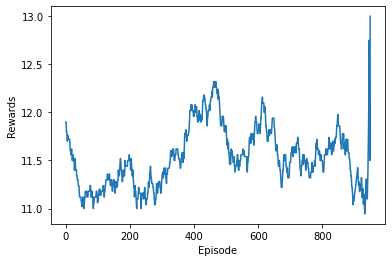

In [ ]:
window = 50
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.plot([np.mean(reward_history[tr: tr+window]) for tr in range(window, len(reward_history))])

In [ ]:
window = 50
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.plot([np.mean(reward_history_stoc[tr: tr+window]) for tr in range(window, len(reward_history_stoc))])